<h1>Continuous vs Discrete Collision Model

<h3>Import

In [5]:
# IMPORTS

import numpy as np
import pandas as pd

import math as m

import matplotlib.pyplot as plt

import seaborn as sns

<h3>Convergence analysis

In [6]:
pressures = [50,100,200,300,400,500]
nrSamples = [1,1,1,1,1,1]
startStep = 200
endStep = 300

R = 10e-9
D = 100e-9

pres_base = './P'
cont_base = '/Continuous/'
disc_base = '/Discrete/'
coll_base = '/out/ramo_current.dt'
headers = ['time', 'step', 'current', 'volt', 'nrPart', 'nrElec', 'nrIon', 'avg_mob', 'avg_part_speed','avg_elec_speed','avg_ion_speed','a','b','c']

ratio = []
density = []

for j,p in enumerate(pressures):
    cont_rate = 0
    disc_rate = 0
    atom_filename = f'{pres_base}{p}{disc_base}S1/out/density_emit_atom.bin'
    atom_type = np.dtype([('x', np.float64), ('y', np.float64), ('z', np.float64), ('emit', np.int64), ('id', np.int64)])
    atom_mem = np.memmap(atom_filename, dtype=atom_type, mode='r', order='F')
    atom_df = pd.DataFrame(atom_mem)
    nrAtom = len(atom_df)
    print(nrAtom/ (R**2 * m.pi * D), 'atoms in the ring emitter at pressure', p, 'Pa')
    density.append(nrAtom / (R**2*m.pi*D))
    for i in range(1,nrSamples[j]+1):
        cont_filename = f'{pres_base}{p}{cont_base}S{i}{coll_base}'
        disc_filename = f'{pres_base}{p}{disc_base}S{i}{coll_base}'
        cont_df = pd.read_csv(filepath_or_buffer=cont_filename, index_col = 1,delim_whitespace=True, \
                        header=None, names=headers)
        disc_df = pd.read_csv(filepath_or_buffer=disc_filename, index_col = 1,delim_whitespace=True, \
                        header=None, names=headers)

        cont_rate += ((cont_df['nrIon'][endStep] - cont_df['nrIon'][startStep]) / (endStep - startStep))/nrSamples[j]

        disc_rate += ((disc_df['nrIon'][endStep] - disc_df['nrIon'][startStep]) / (endStep - startStep))/nrSamples[j]

    ratio.append(cont_rate/disc_rate)

1.2517217964291384e+27 atoms in the ring emitter at pressure 50 Pa
2.503475423846895e+27 atoms in the ring emitter at pressure 100 Pa
5.00695084769379e+27 atoms in the ring emitter at pressure 200 Pa
7.510426271540685e+27 atoms in the ring emitter at pressure 300 Pa
1.001390169538758e+28 atoms in the ring emitter at pressure 400 Pa
1.2517377119234477e+28 atoms in the ring emitter at pressure 500 Pa


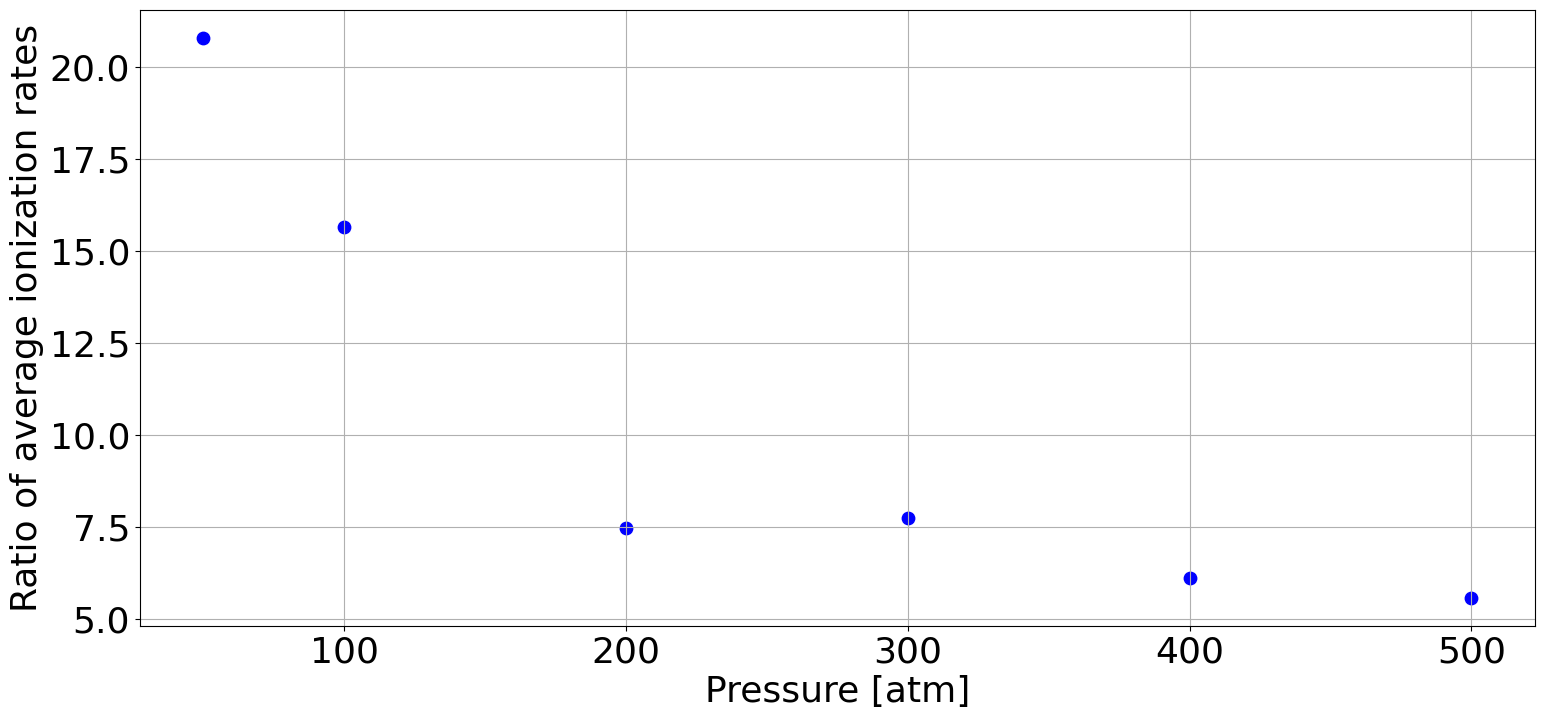

In [7]:
fontz = 26

fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111)
ax.scatter(pressures, ratio, marker='o', color='b', s=80)
ax.set_xlabel(r'Pressure [atm]', fontsize=fontz)
ax.set_ylabel('Ratio of average ionization rates', fontsize=fontz)
ax.tick_params(axis='both', labelsize=fontz)
ax.grid()
# ax.set_title('Convergence of average ionization rates under space charge limited conditions', fontsize=16)
plt.show()

<h3>Collision comparison

In [8]:
n = 1
N = 4000

cont_base = './Continuous/'
disc_base = './Discrete/'
coll_base = '/out/ramo_current.dt'
headers = ['time', 'step', 'current', 'volt', 'nrPart', 'nrElec', 'nrIon', 'avg_mob', 'avg_part_speed','avg_elec_speed','avg_ion_speed','a','b','c']

cont_ions = np.zeros(N)
disc_ions = np.zeros(N)
for i in range(1,n+1):
    cont_filename = f'{cont_base}S{str(i)}{coll_base}'
    df_cur = pd.read_csv(filepath_or_buffer=cont_filename, index_col = 1,delim_whitespace=True, \
                        header=None, names=headers)[:N]
    cont_ions += df_cur['nrIon'].values[:N]/n
    disc_filename = f'{disc_base}S{str(i)}{coll_base}'
    df_cur = pd.read_csv(filepath_or_buffer=disc_filename, index_col = 1,delim_whitespace=True, \
                        header=None, names=headers)[:N]
    disc_ions += df_cur['nrIon'].values[:N]/n

# Plot the number of ions for continuous and discrete
plt.figure(figsize=(12, 6))
plt.plot(df_cur.index[:N], cont_ions, label='Continuous', color='g')
plt.plot(df_cur.index[:N], disc_ions, label='Discrete', color='r')
plt.xlabel('Time step', size='x-large')
plt.ylabel('Number of ions', size='x-large')
# plt.title('Number of ions per step')
plt.legend()
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './Continuous/S1/out/ramo_current.dt'